In [1]:
# sigmoid for cifar-10: adding layers

import tensorflow as tf
import tensorflow.keras as keras

# data preparation
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

# normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# model
model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(32, 32, 3)))

model.add(keras.layers.Conv2D(64, (3, 3), strides=1, 
                              padding='same', activation='sigmoid'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(128, (3, 3), strides=1, 
                              padding='same', activation='sigmoid'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(256, (3, 3), strides=1, 
                              padding='same', activation='sigmoid'))
model.add(keras.layers.MaxPooling2D(2))

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

# training
opt = tf.keras.optimizers.Adam(0.0001)
model.compile(optimizer=opt, metrics=['accuracy'], 
              loss='sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, batch_size=256, 
                    validation_data=(x_test, y_test), 
                    epochs=200, verbose=1)

2022-01-26 11:33:08.660155: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-26 11:33:08.663804: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-26 11:33:08.664066: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-26 11:33:08.664443: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 256)        0

2022-01-26 11:33:10.624737: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2022-01-26 11:33:11.765667: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


196/196 [==============================] - 5s 13ms/step - loss: 2.3173 - accuracy: 0.0988 - val_loss: 2.3141 - val_accuracy: 0.1000
Epoch 2/200
196/196 [==============================] - 2s 11ms/step - loss: 2.3092 - accuracy: 0.1034 - val_loss: 2.3073 - val_accuracy: 0.1000
Epoch 3/200
196/196 [==============================] - 2s 11ms/step - loss: 2.2768 - accuracy: 0.1427 - val_loss: 2.2169 - val_accuracy: 0.1577
Epoch 4/200
196/196 [==============================] - 2s 11ms/step - loss: 2.1321 - accuracy: 0.2328 - val_loss: 2.0784 - val_accuracy: 0.2534
Epoch 5/200
196/196 [==============================] - 2s 11ms/step - loss: 2.0548 - accuracy: 0.2644 - val_loss: 2.0218 - val_accuracy: 0.2883
Epoch 6/200
196/196 [==============================] - 2s 11ms/step - loss: 2.0128 - accuracy: 0.2892 - val_loss: 1.9823 - val_accuracy: 0.3027
Epoch 7/200
196/196 [==============================] - 2s 11ms/step - loss: 1.9726 - accuracy: 0.3025 - val_loss: 1.9448 - val_accuracy: 0.3135
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.0942 - accuracy: 0.6204 - val_loss: 1.1601 - val_accuracy: 0.5865
Epoch 114/200
196/196 [==============================] - 2s 10ms/step - loss: 1.0868 - accuracy: 0.6231 - val_loss: 1.1581 - val_accuracy: 0.5868
Epoch 115/200
196/196 [==============================] - 2s 10ms/step - loss: 1.0855 - accuracy: 0.6216 - val_loss: 1.1597 - val_accuracy: 0.5865
Epoch 116/200
196/196 [==============================] - 2s 10ms/step - loss: 1.0813 - accuracy: 0.6253 - val_loss: 1.1528 - val_accuracy: 0.5926
Epoch 117/200
196/196 [==============================] - 2s 10ms/step - loss: 1.0799 - accuracy: 0.6258 - val_loss: 1.1487 - val_accuracy: 0.5955
Epoch 118/200
196/196 [==============================] - 2s 11ms/step - loss: 1.0757 - accuracy: 0.6267 - val_loss: 1.1546 - val_accuracy: 0.5925
Epoch 119/200
196/196 [==============================] - 2s 11ms/step - loss: 1.0752 - accuracy: 0.6282 - val_loss: 1.1424 - val_accuracy:

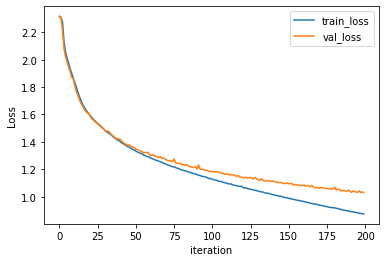

In [2]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = "train_loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

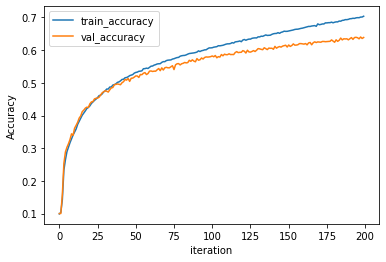

In [3]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = "train_accuracy")
plt.plot(history.history['val_accuracy'], label = "val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()